# Notebook to test models

In [1]:
from rivapy.models.gbm import GBM
from rivapy.models.heston_for_DH import HestonForDeepHedging
#from rivapy.models.roughbergomi_for_DH import rBergomiForDeepHedging
#from rivapy.models.SDE_for_DH import SDEForDeepHedging
#from rivapy.models.VG_CIR import VG_CIR
#from rivapy.models.NIG_CIR import NIG_CIR
#from rivapy.models.NIG_GammaOU import NIG_GammaOU
#from rivapy.models.VG_GammaOU import VG_GammaOU
from rivapy.models.heston_with_jumps import HestonWithJumps
#from rivapy.models.barndorff_nielsen_shephard import BNS

#import sys
#sys.path.insert(0,'../..')
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\Anwender\Documents\GitHub\RiVaPy_development\RiVaPy\rivapy\__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')


Text(0.5, 1.0, 'Models')

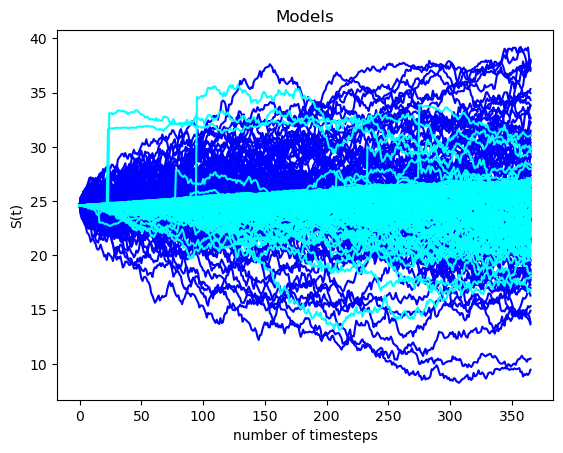

In [43]:
# as in https://perswww.kuleuven.be/~u0009713/ScSiTi03.pdf:
# Heston, NIG_CIR, VG_CIR, NIG_GammaOU, VG_GammaOU

np.random.seed(123)
n = 365
T = n/365
timegrid = np.linspace(0.0,T,n) # simulate on daily timegrid over 30 days
n_sims = 100
S0 = 24.6144
v0 = 0.0654


model = HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2028, correlation_rho = -0.757)
paths_Heston = model.simulate(timegrid, S0=S0, v0=v0, M=n_sims,n=n,model_name='Heston')

v0 = 0.0576
#model = HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.0,
#                  vol_of_vol = 0., correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382)
model = HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382)
paths_HestonWithJumps = model.simulate(timegrid, S0=S0, v0=v0, M=n_sims,n=n,model_name='Heston')

plt.figure()
plt.plot(paths_Heston[:,:], color = 'blue')
plt.plot(paths_HestonWithJumps[:,:], color = 'cyan')
#plt.plot(paths_BNS[:,:],color='grey')
#plt.plot(paths_VG_GammaOU[:,:], color = 'red')
#plt.plot(paths_VG_CIR[:,:], color = 'green')
#plt.plot(paths_NIG_GammaOU[:,:], color = 'orange')
#plt.plot(paths_NIG_CIR[:,:], color = 'black')
#plt.plot(paths_GBM,color='purple')
plt.xlabel('number of timesteps')
plt.ylabel('S(t)')
plt.title('Models')